<a href="https://www.kaggle.com/code/omarmagdy33/loananalysis?scriptVersionId=161029037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
columns= ['ID', 'year', 'loan_limit', 'approv_in_adv','construction_type', 'Credit_Worthiness', 'open_credit', 'Neg_ammortization','interest_only', 'lump_sum_payment', 'occupancy_type', 'credit_type', 'co-applicant_credit_type','submission_of_application']
df.drop(columns, axis=1, inplace =True)

In [5]:
list_str_obj_cols = df.columns[df.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    df[str_obj_col] = df[str_obj_col].astype("category")

In [6]:
pip install git+https://github.com/AnotherSamWilson/miceforest.git


  Cloning https://github.com/AnotherSamWilson/miceforest.git to /tmp/pip-req-build-1bcxtj15
  Running command git clone --filter=blob:none --quiet https://github.com/AnotherSamWilson/miceforest.git /tmp/pip-req-build-1bcxtj15
  Resolved https://github.com/AnotherSamWilson/miceforest.git to commit 41187f6b9b1066fbb12716790101fb9acf466dd9
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.8 MB/s eta 0:00:00
  Created wheel for miceforest: filename=miceforest-5.7.0-py3-none-any.whl size=52103 sha256=d254a08b9cccf8bb667b4d2d182dd626403a3f0a1ee62c366e8b81e7e0bc35f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-sp0dtr3g/wheels/9e/61/95/a289cd3485bf1c42d96f23c4872d4c6f854ae584e150bf2f91
Successfully built miceforest
Note: you may need to restart the kernel to use updated packages.


In [7]:
import miceforest as mf


In [8]:
kds = mf.ImputationKernel(
  df,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm for 2 iterations
kds.mice(5)

# Return the completed dataset.
df = kds.complete_data()

/opt/conda/lib/python3.10/site-packages/miceforest/ImputationKernel.py:370: UserWarning: [Secured_by,Security_Type] have very rare categories, it is a good idea to group these, or set the min_data_in_leaf parameter to prevent lightgbm from outputting 0.0 probabilities.
  warn(


/tmp/ipykernel_18/71113080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amount'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


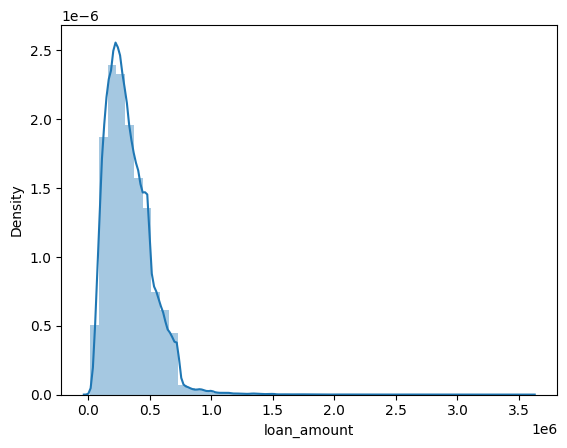

In [9]:
sns.distplot(df['loan_amount'])
plt.show()

In [10]:
x=(df["Region"].value_counts()/len(df))*100
x.values.round(2)

array([50.26, 43.06,  5.85,  0.83])

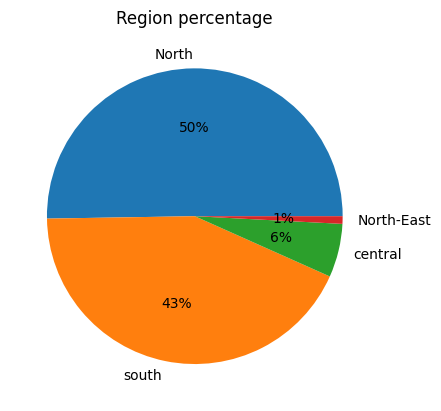

In [11]:
y = x.values.round(2)
mylabels = list(x.index)

plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.1)
plt.title("Region percentage")
plt.show()

In [12]:
x=(df["Gender"].value_counts()/len(df))*100
x.values.round(2)


array([28.48, 27.85, 25.33, 18.34])

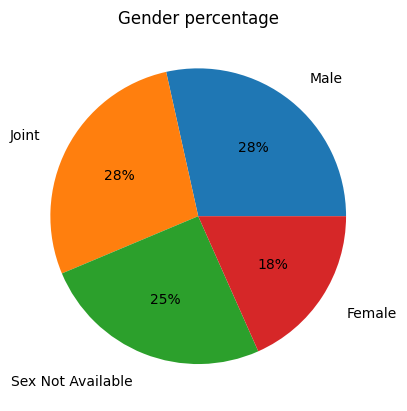

In [13]:
y = x.values.round(2)
mylabels = list(x.index)

plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=.6, labeldistance=1.2)
plt.title("Gender percentage")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


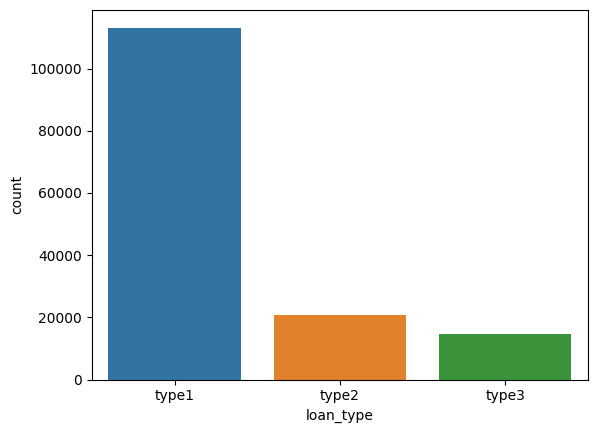

In [14]:
sns.countplot(data=df , x='loan_type')
plt.show()

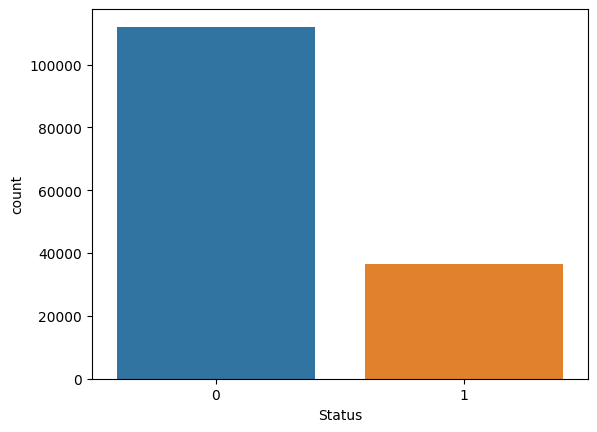

In [15]:
sns.countplot(data=df , x='Status')
plt.show()

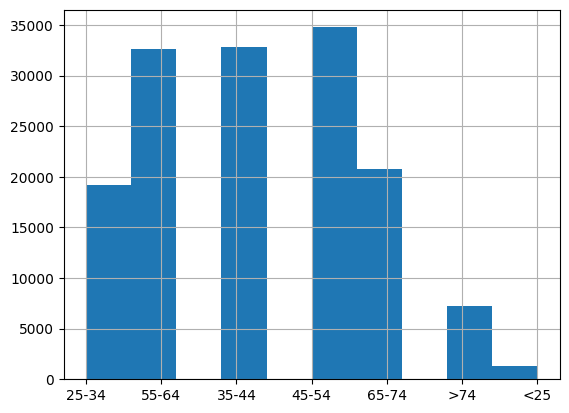

In [16]:
df['age'].hist() 
plt.show()

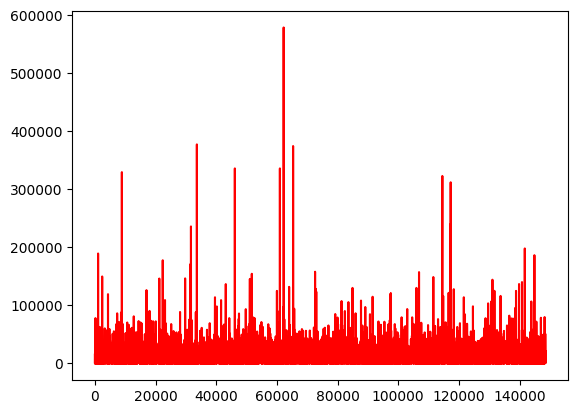

In [17]:
plt.plot(df["income"], color='red')
plt.show()

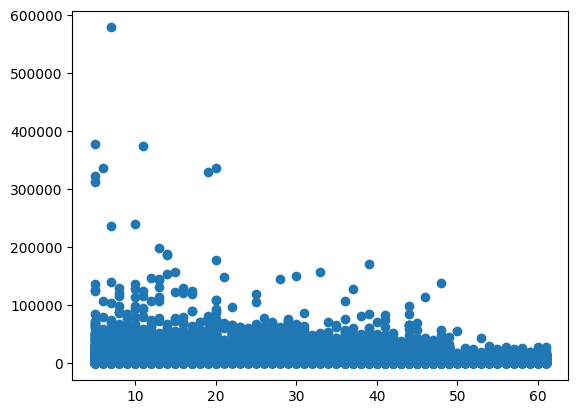

In [18]:
plt.scatter( df['dtir1'],df['income'])
plt.show()

In [19]:
df.groupby(["age"]).agg({"income":'mean',"loan_amount":'mean','dtir1':'mean'}).sort_values('dtir1', ascending=False).head(10)

/tmp/ipykernel_18/3878199377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["age"]).agg({"income":'mean',"loan_amount":'mean','dtir1':'mean'}).sort_values('dtir1', ascending=False).head(10)


,income,loan_amount,dtir1
age,,,
>74,4791.694491,260535.893155,39.649416
<25,4990.990320,250088.979896,39.408042
65-74,5421.545205,269055.753576,39.253311
25-34,6529.772585,357245.357813,38.630607
35-44,7642.346641,376267.222493,37.727027
55-64,6867.420573,305762.976947,37.473708
45-54,7893.806414,352573.349633,37.462218


/tmp/ipykernel_18/1345420706.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Region').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')


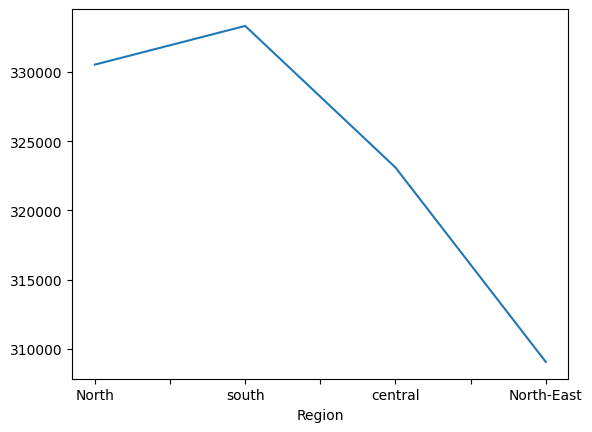

In [20]:
df.groupby('Region').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')
plt.show()

/tmp/ipykernel_18/392779255.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')


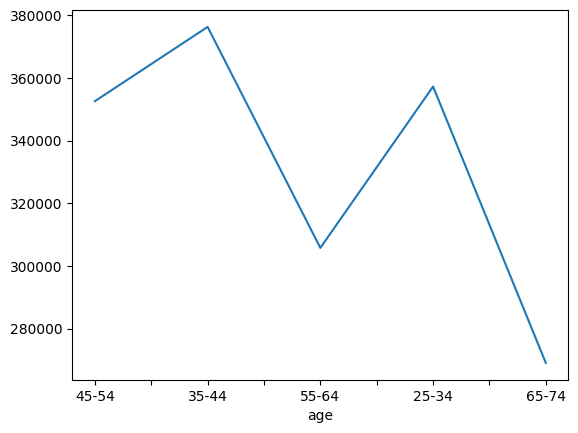

In [21]:
df.groupby('age').agg({'income':'mean',"loan_amount":'mean'}).sort_values("income",ascending=False).head(5)["loan_amount"].plot(kind='line')
plt.show()

In [22]:
df_nums = pd.DataFrame(data= df ,columns = ['loan_amount','rate_of_interest','Interest_rate_spread','Upfront_charges','property_value','income','LTV','dtir1','Status'])


In [23]:
df_nums

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,property_value,income,LTV,dtir1,Status
0,116500,4.990,1.2470,2222.03,118000.0,1740.0,98.728814,45.0,1
1,206500,4.250,1.3977,0.00,248000.0,4980.0,99.311927,41.0,1
2,406500,4.560,0.2000,595.00,508000.0,9480.0,80.019685,46.0,0
3,456500,4.250,0.6810,10240.00,658000.0,11880.0,69.376900,42.0,0
4,696500,4.000,0.3042,0.00,758000.0,10440.0,91.886544,39.0,0
...,...,...,...,...,...,...,...,...,...
148665,436500,3.125,0.2571,9960.00,608000.0,7860.0,71.792763,48.0,0
148666,586500,5.190,0.8544,0.00,788000.0,7140.0,74.428934,15.0,0
148667,446500,3.125,0.0816,1226.64,728000.0,6900.0,61.332418,49.0,0
148668,196500,3.500,0.5824,4323.33,278000.0,7140.0,70.683453,29.0,0


In [24]:
df_nums['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [25]:
X=df_nums.iloc[:,:-1]
Y=df_nums.iloc[:,-1]

In [26]:
X.shape

(148670, 8)

In [27]:
Y.shape

(148670,)

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier().fit(X_train,Y_train)  # Model taraining (fitting)

In [30]:
rf_pred=rf.predict(X_test)  # predict new data

In [31]:
from sklearn.metrics import accuracy_score
print("Radom Forest Classifier accuracy is : ",accuracy_score(Y_test,rf_pred)*100,"%")

Radom Forest Classifier accuracy is :  80.15497201894102 %
